In [74]:
# To Start
# To Start
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error

In [75]:
# import penguins
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [76]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]

# good to use dtype to see which columns are Objects
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Adelie, Chinstrap, Gentoo when looking at confusion matrix

In [79]:
# kNN 1
knn_pipeline1 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', KNeighborsClassifier(n_neighbors=3))
])

# Confusion Matrix
model = knn_pipeline1.fit(X_train, y_train)
y_pred = knn_pipeline1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Overall Accuracy
overall = accuracy_score(y_test, y_pred)
print(overall)

# roc
penguin_prob = model.predict_proba(X_test)
roc = roc_auc_score(y_test, penguin_prob, multi_class='ovr')
print(roc)

[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
1.0
1.0


In [80]:
# precision, recall, f1
classification = classification_report(y_test, y_pred)

print(classification)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [81]:
# kNN 2
knn_pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', KNeighborsClassifier(n_neighbors=200))
])

# Confusion Matrix
model2 = knn_pipeline2.fit(X_train, y_train)
y_pred2 = knn_pipeline2.predict(X_test)

cm = confusion_matrix(y_test, y_pred2)
print(cm)

# Overall Accuracy
overall = accuracy_score(y_test, y_pred2)
print(overall)

# roc
penguin_prob2 = model2.predict_proba(X_test)
roc2 = roc_auc_score(y_test, penguin_prob2, multi_class='ovr')
print(roc2)

[[29  0  0]
 [14  0  0]
 [ 0  0 24]]
0.7910447761194029
0.9703088234574726


In [82]:
# precision, recall, f1
classification2 = classification_report(y_test, y_pred)

print(classification2)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [83]:
# Decision Tree 1
tree_pipeline1 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', DecisionTreeClassifier(max_depth=3, random_state=18))
])

# Confusion Matrix
model3 = tree_pipeline1.fit(X_train, y_train)
y_pred3 = tree_pipeline1.predict(X_test)

cm = confusion_matrix(y_test, y_pred3)
print(cm)

# Overall Accuracy
overall = accuracy_score(y_test, y_pred3)
print(overall)

# roc
penguin_prob3 = model3.predict_proba(X_test)
roc3 = roc_auc_score(y_test, penguin_prob3, multi_class='ovr')
print(roc3)

[[29  0  0]
 [ 1 13  0]
 [ 0  0 24]]
0.9850746268656716
0.9988724250443938


In [84]:
# precision, recall, f1
classification3 = classification_report(y_test, y_pred)

print(classification3)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [85]:
# Decision Tree 2
tree_pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', DecisionTreeClassifier(max_depth=8, random_state=18))
])

# Confusion Matrix
model4 = tree_pipeline2.fit(X_train, y_train)
y_pred4 = tree_pipeline2.predict(X_test)

cm = confusion_matrix(y_test, y_pred4)
print(cm)

# Overall Accuracy
overall = accuracy_score(y_test, y_pred4)
print(overall)

# roc
penguin_prob4 = model4.predict_proba(X_test)
roc4 = roc_auc_score(y_test, penguin_prob4, multi_class='ovr')
print(roc4)

[[28  1  0]
 [ 1 13  0]
 [ 0  0 24]]
0.9701492537313433
0.9748174926581256


In [86]:
# precision, recall, f1
classification4 = classification_report(y_test, y_pred4)

print(classification4)

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.93      0.93      0.93        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



ROC Plot: Adelie Penguins

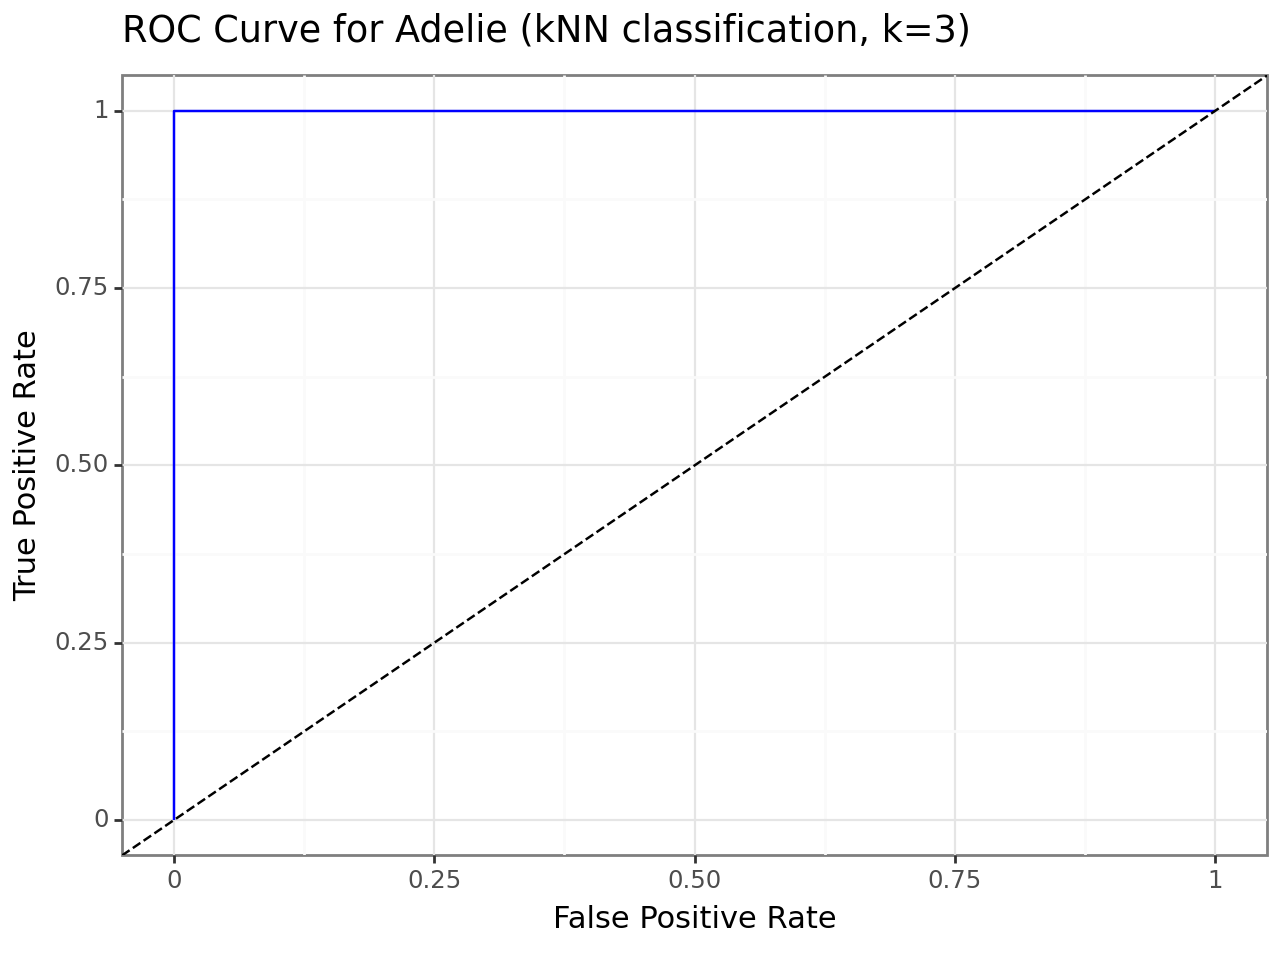

<Figure Size: (640 x 480)>

In [87]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from plotnine import *

class_names = ['Adelie','Chinstrap', 'Gentoo']
# Binarize y_test for the Adelies
y_test_binarized = label_binarize(y_test, classes=class_names)[:, class_names.index('Adelie')]

# Predict probabilities for the Adelies
y_test_pred_proba = model.predict_proba(X_test)[:, class_names.index('Adelie')]

# Calculate ROC curve metrics for the Adelies
fpr, tpr, thresholds_ = roc_curve(y_test_binarized, y_test_pred_proba)


roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

# Create ROC plot
roc_plot = (
    ggplot(roc_df, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line(color="blue")
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Adelie (kNN classification, k=3)', x='False Positive Rate', y='True Positive Rate')
    + theme_bw()
)

roc_plot